In [5]:
#Library Imports

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
import statsmodels.api as sm 
from sklearn.metrics import r2_score
from pylab import *

In [6]:
#Importing data as dataframe 

df = pd.read_csv (r"C:\Users\timeo\Downloads\MiningProcess_Flotation_Plant_Database.csv")

In [7]:
#Viewing data with initial rows

df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [8]:
#Checking null values

df.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [9]:
#Statistical view of data

df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,...,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409317,319416,180189,131143,105805,43675,80442,...,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,2017-06-16 15:00:00,"64,03","6,26","2562,5","534,668","402,246","10,0591","1,75","299,927","255,322",...,"299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,...,3405,1013,817,989,733,709,746,905,16920,17100


In [10]:
#info column wise about memory usage, data type and entries

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [11]:
# Replacing ' ' by '_'
df.columns = df.columns.str.replace(' ','_')

# Replacing '%' symbol with 'percent'
df.columns = df.columns.str.replace('%','percent')

# Changing the column names to lower case
df.columns= df.columns.str.lower()


# Replacing ',' with '.' 
for column in df.columns:
    df[column] = df[column].apply(lambda x: x.replace(',', '.'))


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   percent_iron_feed             737453 non-null  object
 2   percent_silica_feed           737453 non-null  object
 3   starch_flow                   737453 non-null  object
 4   amina_flow                    737453 non-null  object
 5   ore_pulp_flow                 737453 non-null  object
 6   ore_pulp_ph                   737453 non-null  object
 7   ore_pulp_density              737453 non-null  object
 8   flotation_column_01_air_flow  737453 non-null  object
 9   flotation_column_02_air_flow  737453 non-null  object
 10  flotation_column_03_air_flow  737453 non-null  object
 11  flotation_column_04_air_flow  737453 non-null  object
 12  flotation_column_05_air_flow  737453 non-null  object
 13 

In [12]:
#dropping 'date' from dataset
df = df.drop(['date'], axis = 1)

#changing dtype of numeric data from object to float.
df = df.astype(float) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   percent_iron_feed             737453 non-null  float64
 1   percent_silica_feed           737453 non-null  float64
 2   starch_flow                   737453 non-null  float64
 3   amina_flow                    737453 non-null  float64
 4   ore_pulp_flow                 737453 non-null  float64
 5   ore_pulp_ph                   737453 non-null  float64
 6   ore_pulp_density              737453 non-null  float64
 7   flotation_column_01_air_flow  737453 non-null  float64
 8   flotation_column_02_air_flow  737453 non-null  float64
 9   flotation_column_03_air_flow  737453 non-null  float64
 10  flotation_column_04_air_flow  737453 non-null  float64
 11  flotation_column_05_air_flow  737453 non-null  float64
 12  flotation_column_06_air_flow  737453 non-nul

In [14]:
#dropping duplicates
df = pd.DataFrame.drop_duplicates(df)

#checking number of entries again 
df.shape

(736282, 23)

### Data Exploration

#### Data Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

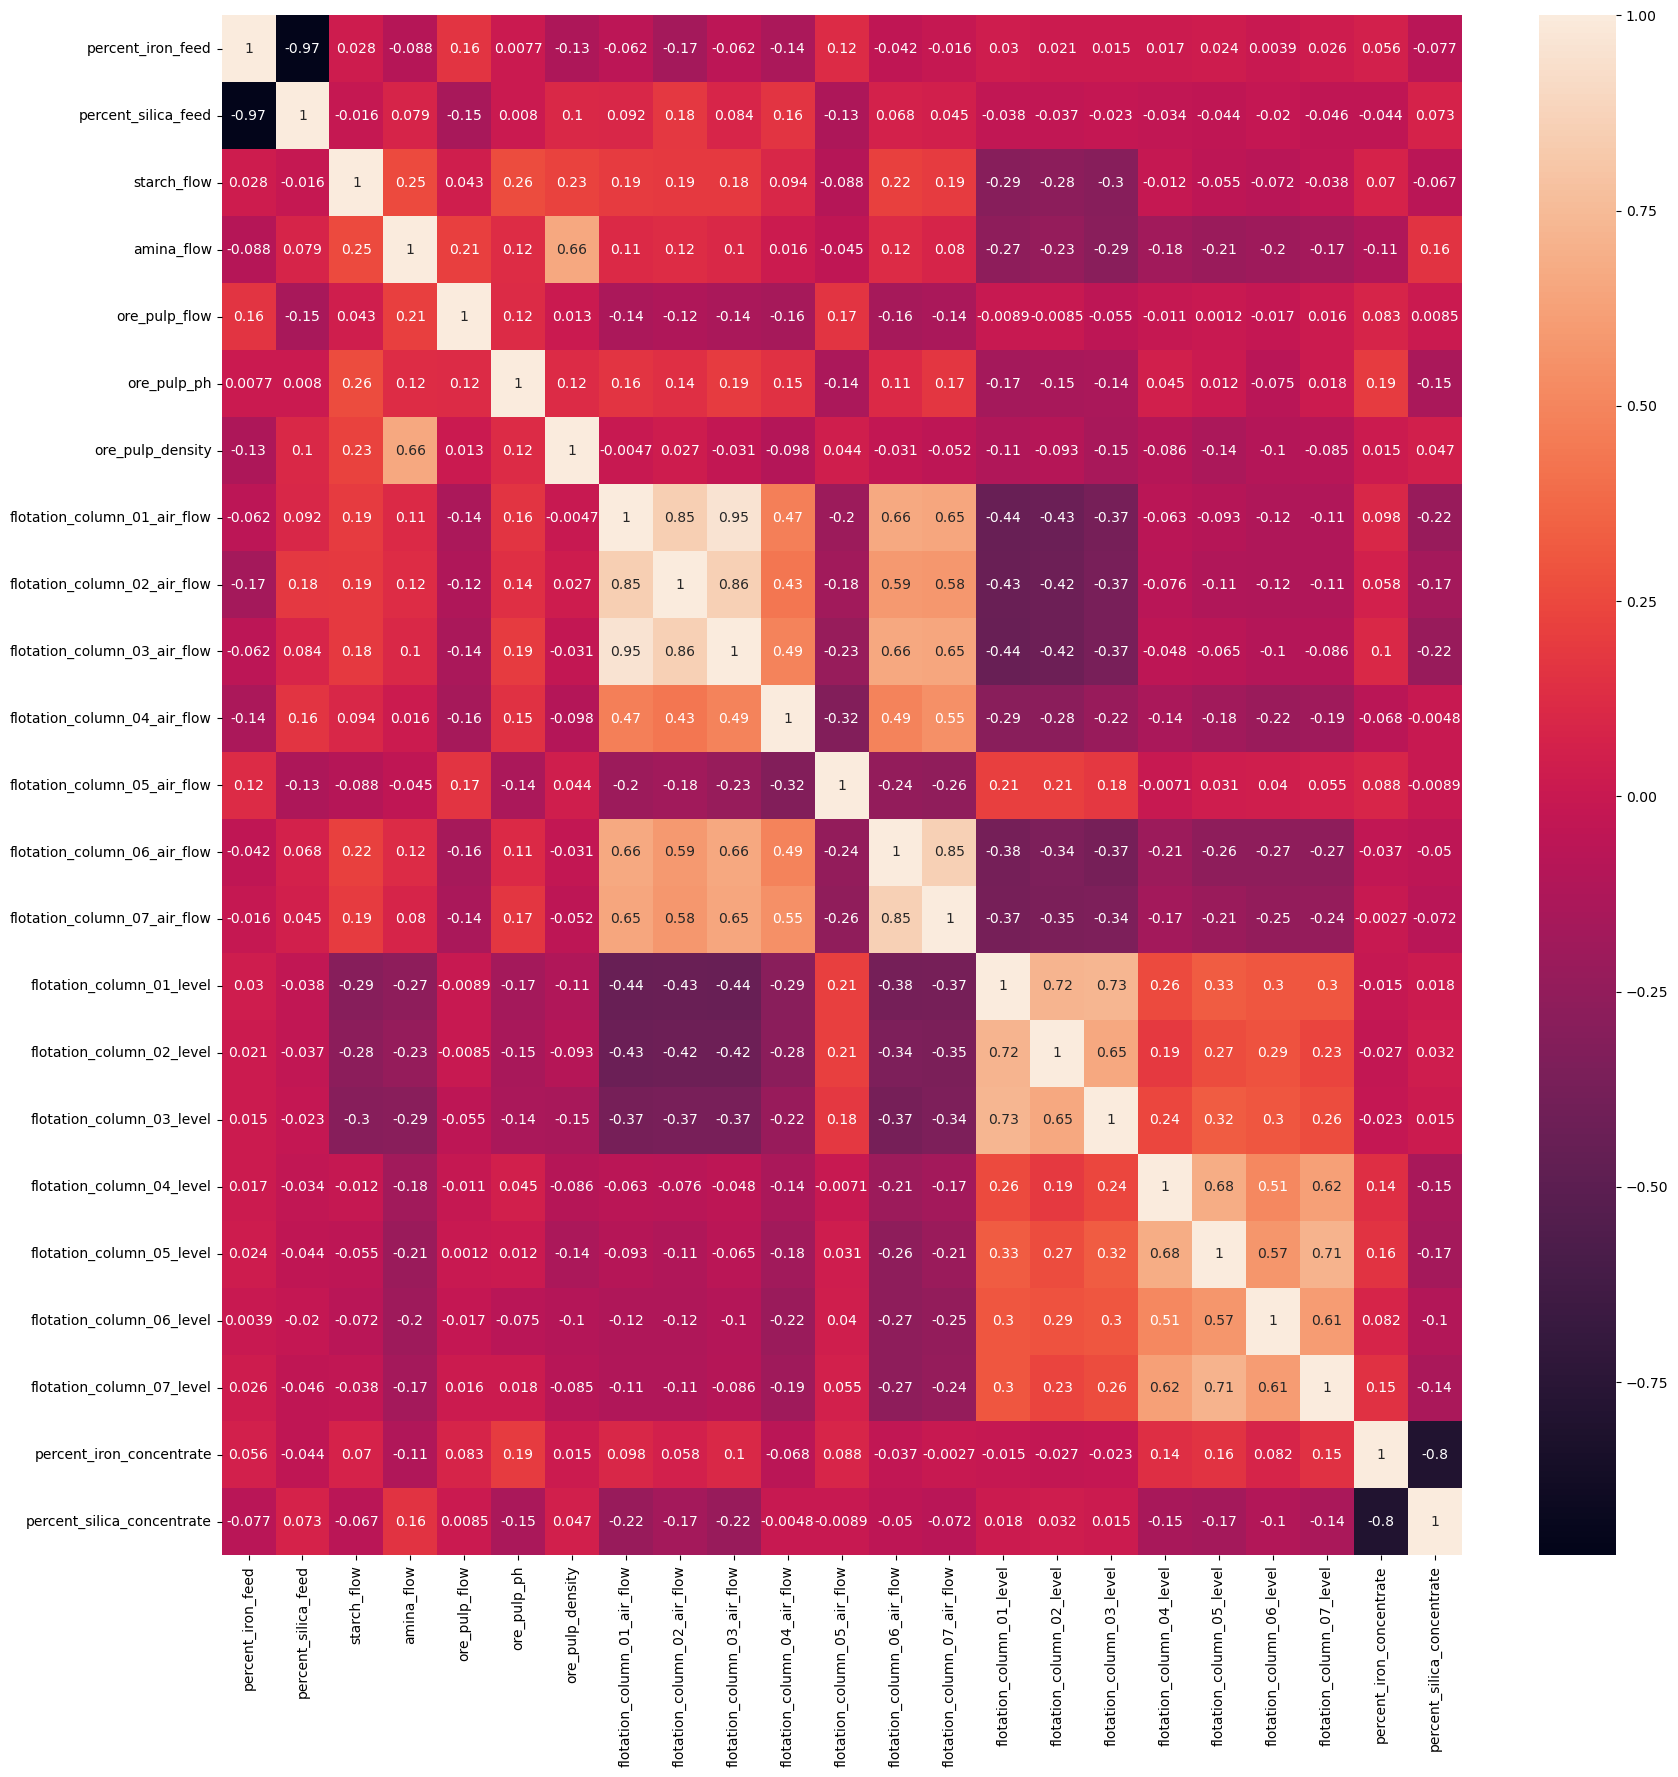

In [15]:
#Using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show

<AxesSubplot:>

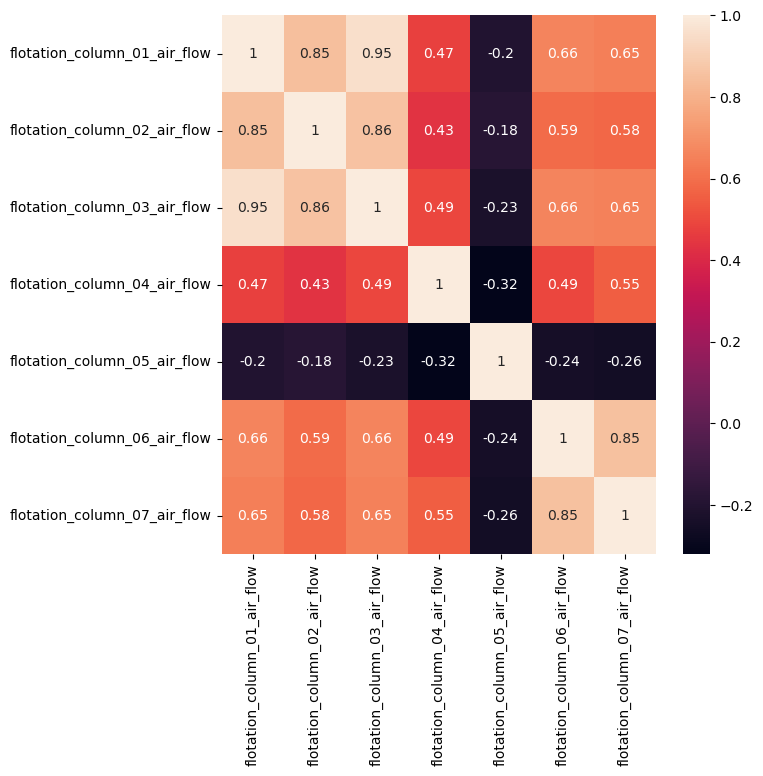

In [16]:
#Checking the corelation of air_flow

cor = df.iloc[:,7:14].corr();
plt.figure(figsize=(7,7))
sns.heatmap(cor, annot =True)

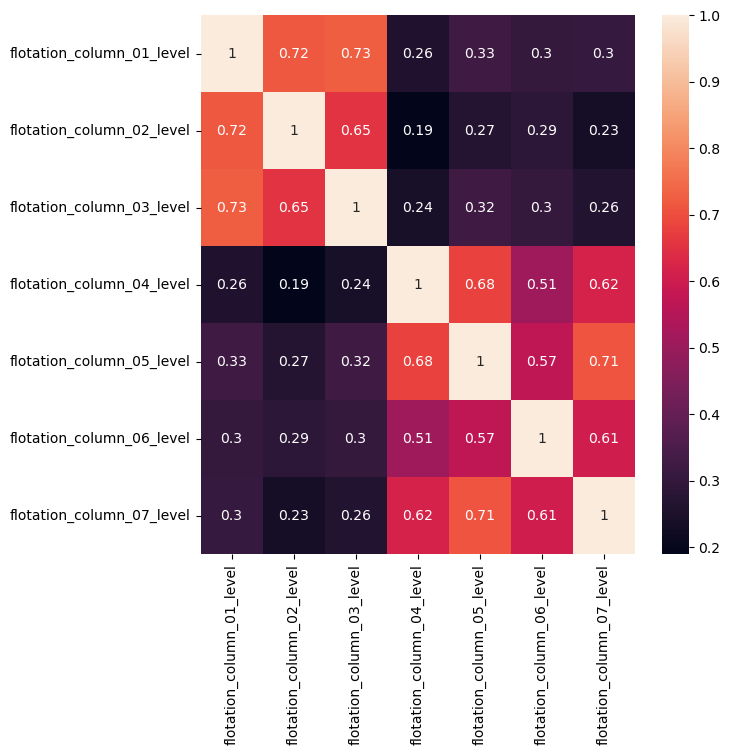

In [17]:
#Checking the level parameter

cor =df.iloc[:,14:21].corr();
plt.figure(figsize=(7,7))
sns.heatmap(cor, annot=True);

### Looking at the correlations we observe that there are high correlations between floatation air flows and floatations column's levels. Having the process flowchart will show how the floatation columns are connected and will help explain these high correlations

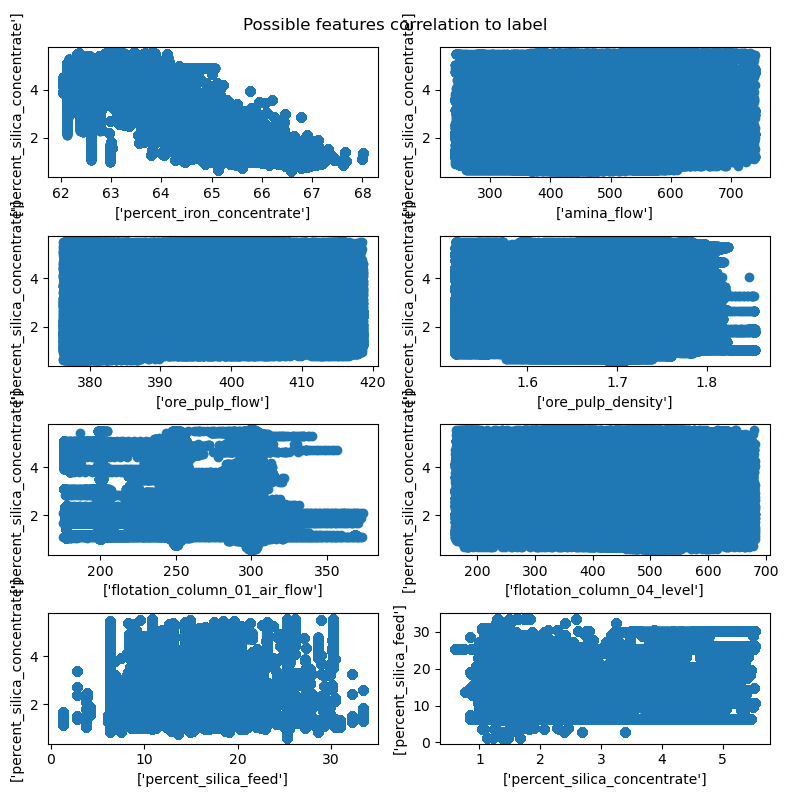

In [18]:
## Feature vs Label Correlation Plot

fig, axs =plt.subplots(4,2,figsize=(8, 8))
fig.suptitle('Possible features correlation to label')


axs[0,0].scatter(df['percent_iron_concentrate'],df['percent_silica_concentrate'])
axs[0,0].set_xlabel(['percent_iron_concentrate'])
axs[0,0].set_ylabel(['percent_silica_concentrate'])

axs[0,1].scatter(df['amina_flow'],df['percent_silica_concentrate'])
axs[0,1].set_xlabel(['amina_flow'])
axs[0,1].set_ylabel(['percent_silica_concentrate'])

axs[1,0].scatter(df['ore_pulp_flow'],df['percent_silica_concentrate'])
axs[1,0].set_xlabel(['ore_pulp_flow'])
axs[1,0].set_ylabel(['percent_silica_concentrate'])

axs[1,1].scatter(df['ore_pulp_density'],df['percent_silica_concentrate'])
axs[1,1].set_xlabel(['ore_pulp_density'])
axs[1,1].set_ylabel(['percent_silica_concentrate'])

axs[2,0].scatter(df['flotation_column_01_air_flow'],df['percent_silica_concentrate'])
axs[2,0].set_xlabel(['flotation_column_01_air_flow'])
axs[2,0].set_ylabel(['percent_silica_concentrate'])

axs[2,1].scatter(df[ 'flotation_column_04_level'],df['percent_silica_concentrate'])
axs[2,1].set_xlabel([ 'flotation_column_04_level'])
axs[2,1].set_ylabel(['percent_silica_concentrate'])


axs[3,0].scatter(df['percent_silica_feed'],df['percent_silica_concentrate'])
axs[3,0].set_xlabel(['percent_silica_feed'])
axs[3,0].set_ylabel(['percent_silica_concentrate'])


axs[3,1].scatter(df['percent_silica_concentrate'],df['percent_silica_feed'])
axs[3,1].set_xlabel(['percent_silica_concentrate'])
axs[3,1].set_ylabel(['percent_silica_feed'])


plt.tight_layout()

## >> Data exploration Conclusion
The significant feature relating with label is on '% iron concentrate' in the product so it is not proper if the model is built without % iron concentrate as feature
#### Action:

 -Select only the possible features, drop other column
 
 -Do feature engineering for % iron concentrate (from x to x^2)

In [19]:
# Action1: Select only the possible features, drop other column

df.columns
droplist=['percent_iron_feed', 'starch_flow',  'ore_pulp_ph', 'flotation_column_02_air_flow',
          'flotation_column_03_air_flow', 'flotation_column_04_air_flow',
          'flotation_column_05_air_flow', 'flotation_column_06_air_flow',
          'flotation_column_07_air_flow', 'flotation_column_01_level',
          'flotation_column_02_level', 'flotation_column_03_level', 'flotation_column_05_level',
          'flotation_column_06_level', 'flotation_column_07_level',]

df=df.drop(droplist,axis=1)
df.shape

(736282, 8)

In [20]:
# Action2 : Polynomial Feature Engineering for 

df['percent_iron_concentrate_power2']=df['percent_iron_concentrate']**2

df

,percent_silica_feed,amina_flow,ore_pulp_flow,ore_pulp_density,flotation_column_01_air_flow,flotation_column_04_level,percent_iron_concentrate,percent_silica_concentrate,percent_iron_concentrate_power2
0,16.98,557.434,395.713,1.74000,249.214,443.558,66.91,1.31,4476.9481
1,16.98,563.965,397.383,1.74000,249.719,448.086,66.91,1.31,4476.9481
2,16.98,568.054,399.668,1.74000,249.741,449.688,66.91,1.31,4476.9481
3,16.98,568.665,397.939,1.74000,249.917,446.210,66.91,1.31,4476.9481
4,16.98,558.167,400.254,1.74000,250.203,453.670,66.91,1.31,4476.9481
...,...,...,...,...,...,...,...,...,...
737448,23.20,441.052,386.570,1.65365,302.344,418.725,64.27,1.71,4130.6329
737449,23.20,473.436,384.939,1.65352,303.013,418.377,64.27,1.71,4130.6329
737450,23.20,500.488,383.496,1.65338,303.662,419.531,64.27,1.71,4130.6329
737451,23.20,491.548,384.976,1.65324,302.550,407.299,64.27,1.71,4130.6329


### Training & Selection Regression Model¶
- Linear Regression Model with Regularization Term (Lassso Model)
- Linear Regression Model with Regularization Term (Ridge Model)
- Random Forest Model

In [21]:
df.columns

Index(['percent_silica_feed', 'amina_flow', 'ore_pulp_flow',
       'ore_pulp_density', 'flotation_column_01_air_flow',
       'flotation_column_04_level', 'percent_iron_concentrate',
       'percent_silica_concentrate', 'percent_iron_concentrate_power2'],
      dtype='object')

In [22]:
## Split data to training set and test set 

from sklearn.model_selection import train_test_split

X=df.drop('percent_silica_concentrate',axis=1)

y=df['percent_silica_concentrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(736282,)
(589025,)
(147257,)


In [23]:
# normalize the training data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_train_norm,axis=0)}")

Peak to Peak range by column in Raw X:percent_silica_feed                 32.09000
amina_flow                         497.85000
ore_pulp_flow                       42.39200
ore_pulp_density                     0.33343
flotation_column_01_air_flow       198.36100
flotation_column_04_level          518.15800
percent_iron_concentrate             5.96000
percent_iron_concentrate_power2    775.15760
dtype: float64
Peak to Peak range by column in Normalized X:[4.70819598 5.45455721 4.36896751 4.81709479 6.69191971 5.6500423
 5.32637879 5.34844583]


In [24]:
# Define Validation Function

from sklearn.model_selection import cross_validate

def model_trainval(model,x,y):
    
    scoring = ['neg_root_mean_squared_error', 'r2']
    scores = cross_validate(model, x, y, scoring=scoring)
    RMSE = scores['test_neg_root_mean_squared_error'].mean()
    R2 = scores['test_r2'].mean()
    print("Result of Model Validation")
    print(f"RMSE : {RMSE}")
    print(f"R2 :{R2}")
    
    return RMSE,R2

In [25]:
### Linear Regression Model with Regularization Term (Lassso)

from sklearn.linear_model import Lasso

reg1=Lasso(alpha=0.001)

## Model Training & Cross Validation

[RMSE, R2]=model_trainval(reg1,X_train_norm,y_train)

RMSE_Col=[]
R2_Col=[]

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -0.6432543260073788
R2 :0.6737106167990408


In [26]:
### Linear Regression Model with Regularization Term (Ridge Model)

from sklearn.linear_model import Ridge

reg2=Ridge(alpha=0.001)

## Model Training & Cross Validation

[RMSE,R2]=model_trainval(reg2,X_train_norm,y_train)

RMSE_Col.append(RMSE)
R2_Col.append(R2)


Result of Model Validation
RMSE : -0.6345534786151713
R2 :0.6824772045950201


In [27]:
### Random Forest Tree Model

from sklearn.ensemble import RandomForestRegressor

reg3=RandomForestRegressor(max_depth=10,n_estimators=10)

## Model Training & Cross Validation

[RMSE,R2]=model_trainval(reg3,X_train_norm,y_train)

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -0.407501131131227
R2 :0.8690465212271891


Remark: we try to reduce n_estimators to reduce time computation. At n_estimators=100 and n_estimators=10 are not different significantly so I decide to manually adjust n_estimators =10 to reduce training time¶


[Text(0.4834908894984326, 0.9545454545454546, 'X[6] <= -0.563\nsquared_error = 1.272\nsamples = 372119\nvalue = 2.328'),
 Text(0.23509012539184954, 0.8636363636363636, 'X[7] <= -1.111\nsquared_error = 1.001\nsamples = 96441\nvalue = 3.725'),
 Text(0.12036637931034483, 0.7727272727272727, 'X[7] <= -1.348\nsquared_error = 0.692\nsamples = 53895\nvalue = 4.161'),
 Text(0.06622257053291536, 0.6818181818181818, 'X[5] <= 2.456\nsquared_error = 0.602\nsamples = 42609\nvalue = 4.245'),
 Text(0.039537617554858934, 0.5909090909090909, 'X[1] <= 0.747\nsquared_error = 0.6\nsamples = 41198\nvalue = 4.223'),
 Text(0.02006269592476489, 0.5, 'X[0] <= -0.999\nsquared_error = 0.627\nsamples = 28645\nvalue = 4.14'),
 Text(0.010031347962382446, 0.4090909090909091, 'X[5] <= 0.462\nsquared_error = 0.819\nsamples = 5892\nvalue = 3.859'),
 Text(0.005015673981191223, 0.3181818181818182, 'X[7] <= -1.662\nsquared_error = 0.579\nsamples = 5112\nvalue = 3.965'),
 Text(0.0025078369905956114, 0.22727272727272727, 'X

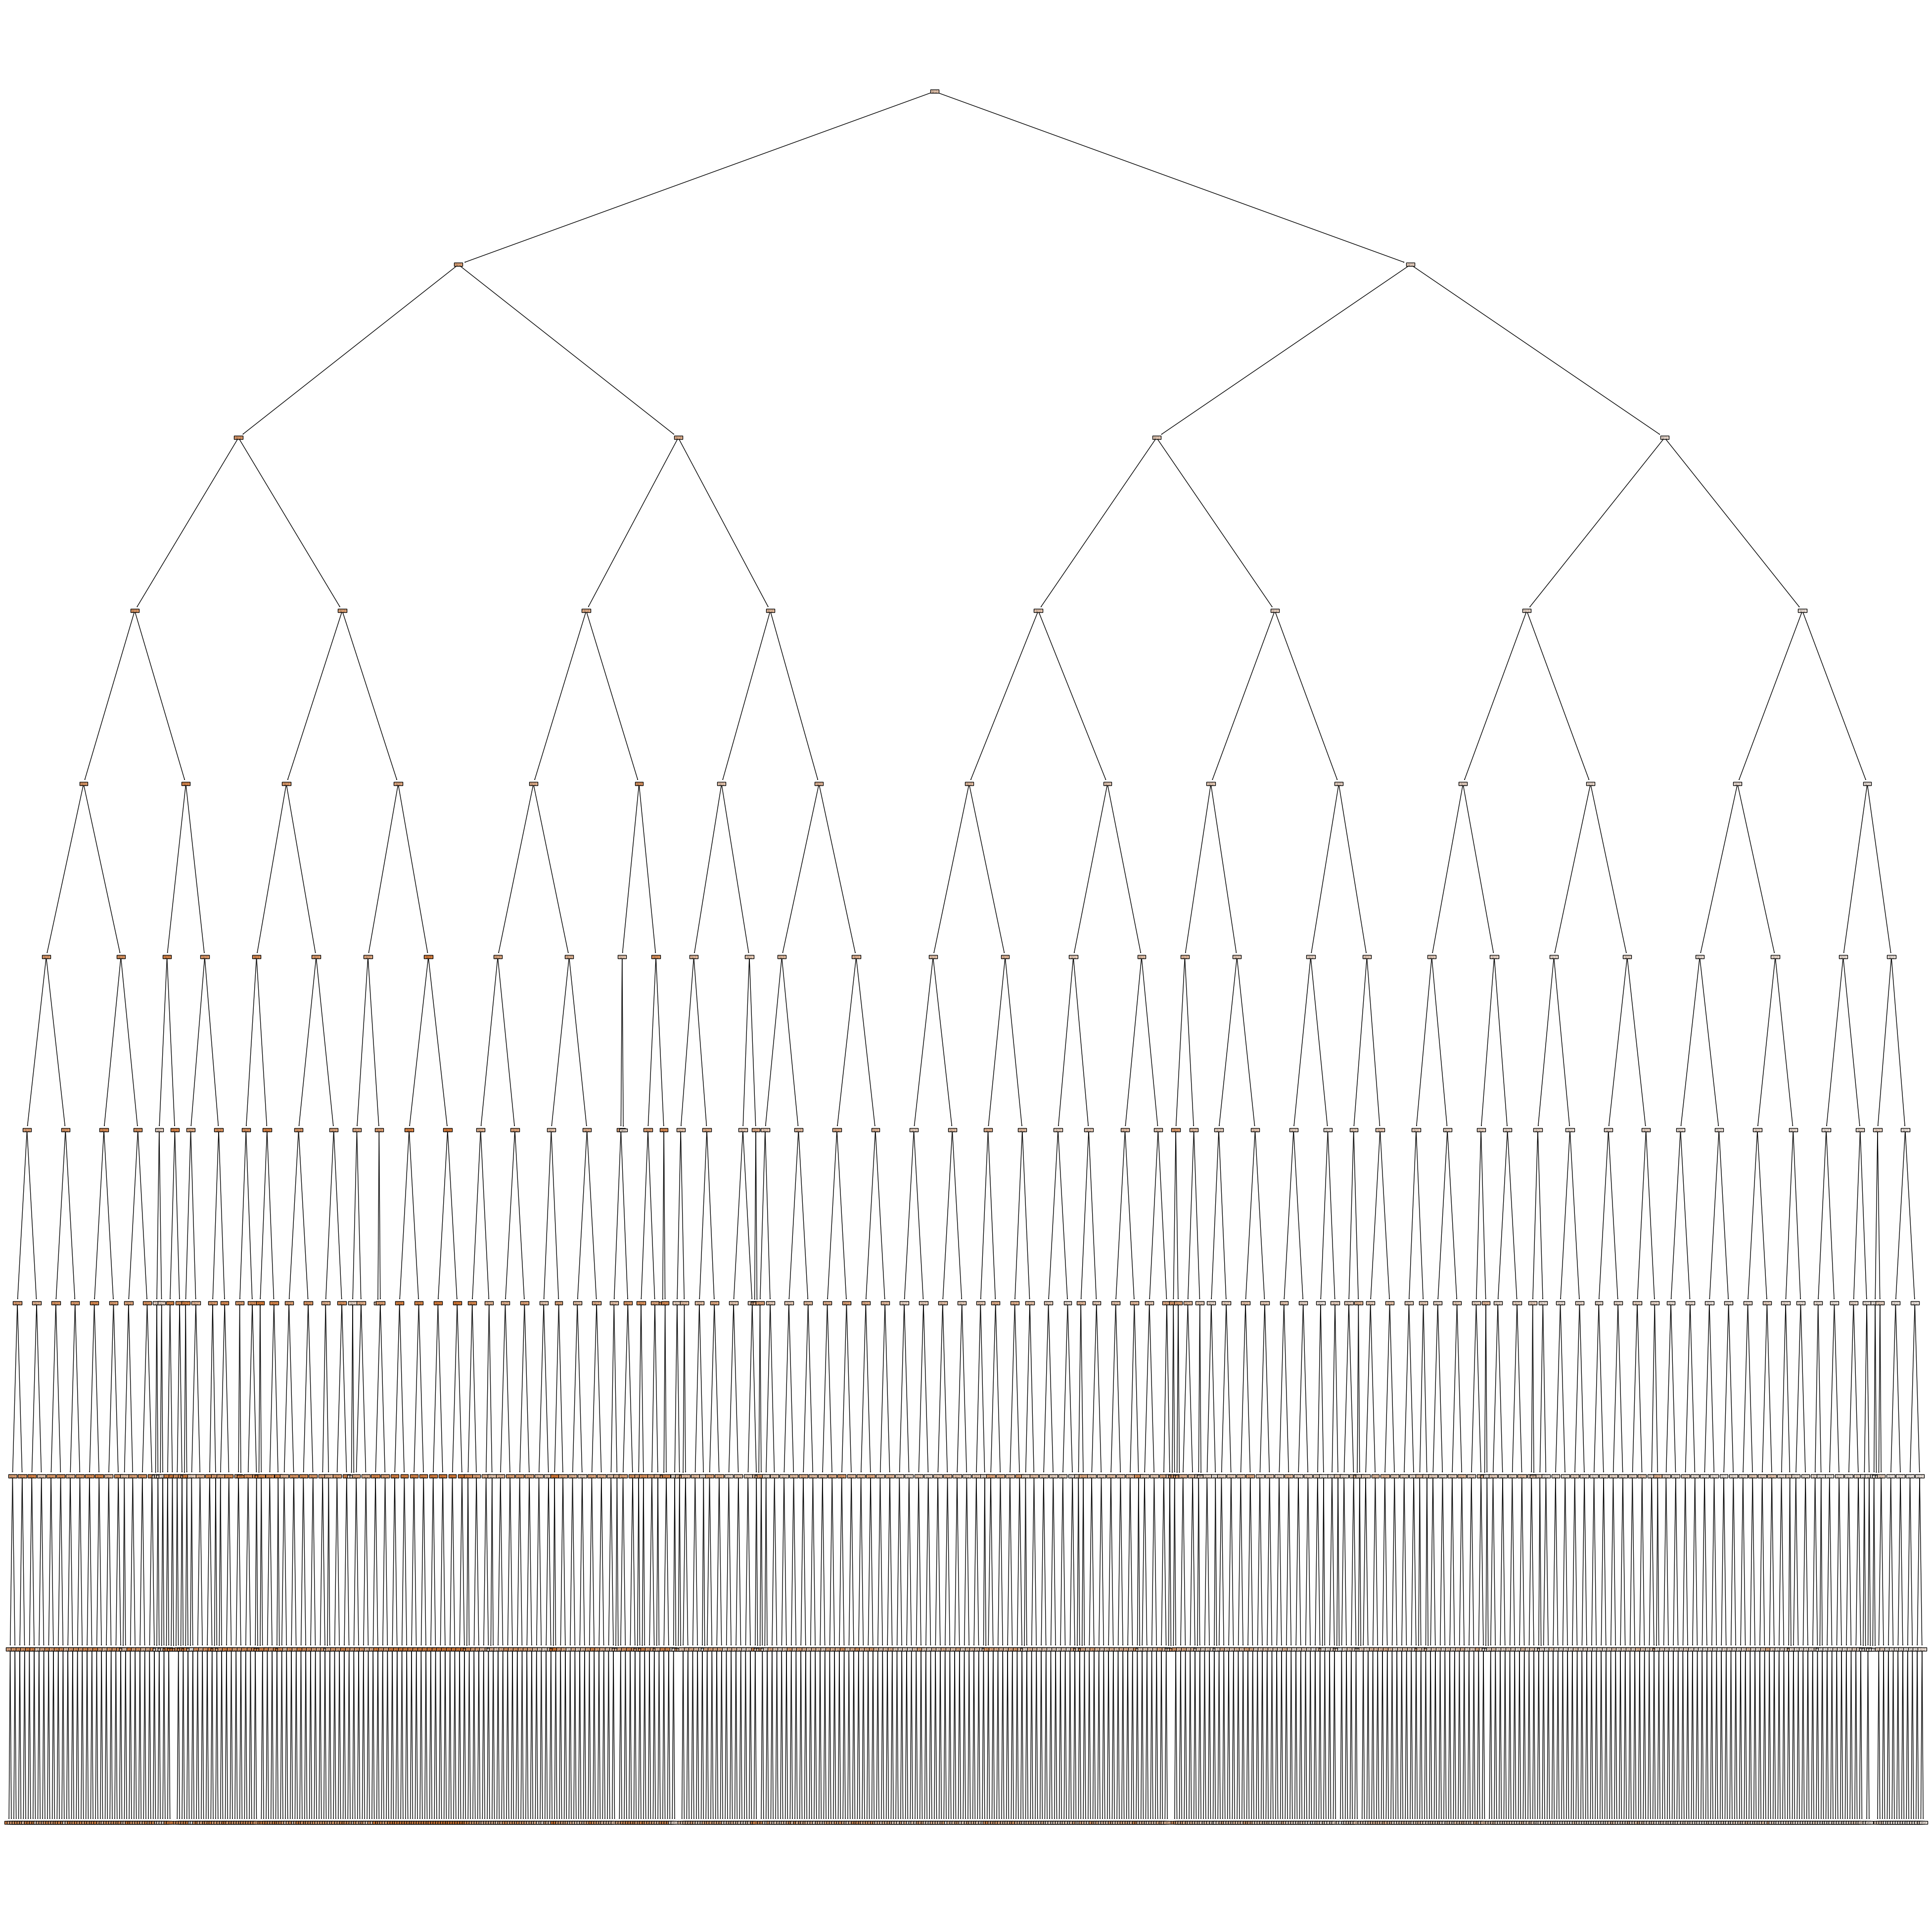

In [29]:
# Tree graphic model 

reg3.fit(X_train_norm,y_train)

plt.figure(figsize=(50,50))

from sklearn.tree import plot_tree

plot_tree(reg3.estimators_[0],filled=True)


Remark: The trees seem to be complicated so we will test it again with test data to monitor overshooting¶


In [30]:
print(RMSE_Col,R2_Col)

[-0.6432543260073788, -0.6345534786151713, -0.407501131131227] [0.6737106167990408, 0.6824772045950201, 0.8690465212271891]


<function matplotlib.pyplot.show(close=None, block=None)>

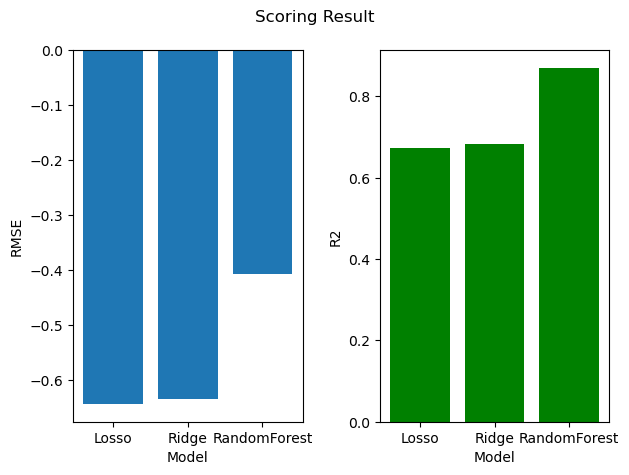

In [31]:
# plot graph performance comparison each pre-selected model 

Xgraph=['Losso','Ridge','RandomForest']

fig,axes=plt.subplots(nrows=1,ncols=2)

fig.suptitle("Scoring Result")
axes[0].bar(Xgraph,RMSE_Col)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("RMSE")

axes[1].bar(Xgraph,R2_Col,color='g')
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R2")

plt.tight_layout()
plt.show

Result: a Random Forest model is selected as per scoring result¶


## Model Testing (before deployment)

In [32]:
# normalize the test data 

scaler = StandardScaler()
X_test_norm = scaler.fit_transform(X_test)


## Prediction
y_pred=reg3.predict(X_test_norm)

## Evaluation 

from sklearn.metrics import mean_squared_error, r2_score

RMSE_Testing=mean_squared_error(y_test,y_pred)
R2_Testing=r2_score(y_test,y_pred)

print(f"RMSE of test result : {RMSE_Testing} ")
print(f"R2 of test result : {R2_Testing} ")

RMSE of test result : 0.18269114714082976 
R2 of test result : 0.8552928727209637 


Remark: The result shows that R2 on test data (R2=0.8539 ) and R2 on CV data (R2=0.8672) is not difference significantly so the the model should be just fit but It is monitored again during on production¶


In [33]:
#Built Dataframe for test result

result_label=pd.DataFrame()

result_label['percent_silica_concentrate']=y_test
result_label['predicted percent_silica_concentrate']=y_pred


##  Project Summarization¶

> The Random Forest Model is selected as the prediction model with Root Mean Square error at 0.181 wih R Square at 0.857

> Comparing performance between Cross-Validation data set and test set. we found the perfromance that it is not drop significantly, so the model should be used proper in deployment step

> The % iron concentrate is still be used as feature because other features are not relate with the lable significantly, so we are still had to sample to check lab result.

> Compared the predicted % silica concentration with test set as below table;

In [34]:
print(result_label.reset_index().head(50))


     index  percent_silica_concentrate  predicted percent_silica_concentrate
0   125925                    4.900000                              4.577727
1   258592                    1.490000                              1.594263
2   695481                    1.260000                              1.628594
3   727423                    1.980000                              1.887812
4   443007                    2.200000                              2.063845
5     1518                    1.730000                              1.391922
6   251876                    2.320000                              3.471885
7   267155                    1.840000                              1.619649
8   235001                    1.550000                              1.678377
9    16642                    3.880000                              3.221504
10   81072                    1.550000                              1.543071
11   48450                    5.310838                              4.394532